# Predicting Divorce

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")
sns.set_style("darkgrid")
import missingno as msno
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
df = pd.read_csv("/kaggle/input/predicting-divorce/divorce.csv")
display(df)

,Sorry_end,Ignore_diff,begin_correct,Contact,Special_time,No_home_time,2_strangers,enjoy_holiday,enjoy_travel,common_goals,...,silence_for_harm,silence_fear_anger,I'm_right,accusations,I'm_not_guilty,I'm_not_wrong,no_hesitancy_inadequate,you're_inadequate,incompetence,Divorce_Y_N
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,0,0,0,0,0,...,1,0,4,1,1,4,2,2,2,0
166,0,0,0,0,0,0,0,0,0,0,...,4,1,2,2,2,2,3,2,2,0
167,1,1,0,0,0,0,0,0,0,1,...,3,0,2,0,1,1,3,0,0,0
168,0,0,0,0,0,0,0,0,0,0,...,3,3,2,2,3,2,4,3,1,0


In [3]:
print(f"Dataset consists of {df.shape[0]} rows and {df.shape[1]} columns")

Dataset consists of 170 rows and 55 columns


<AxesSubplot:>

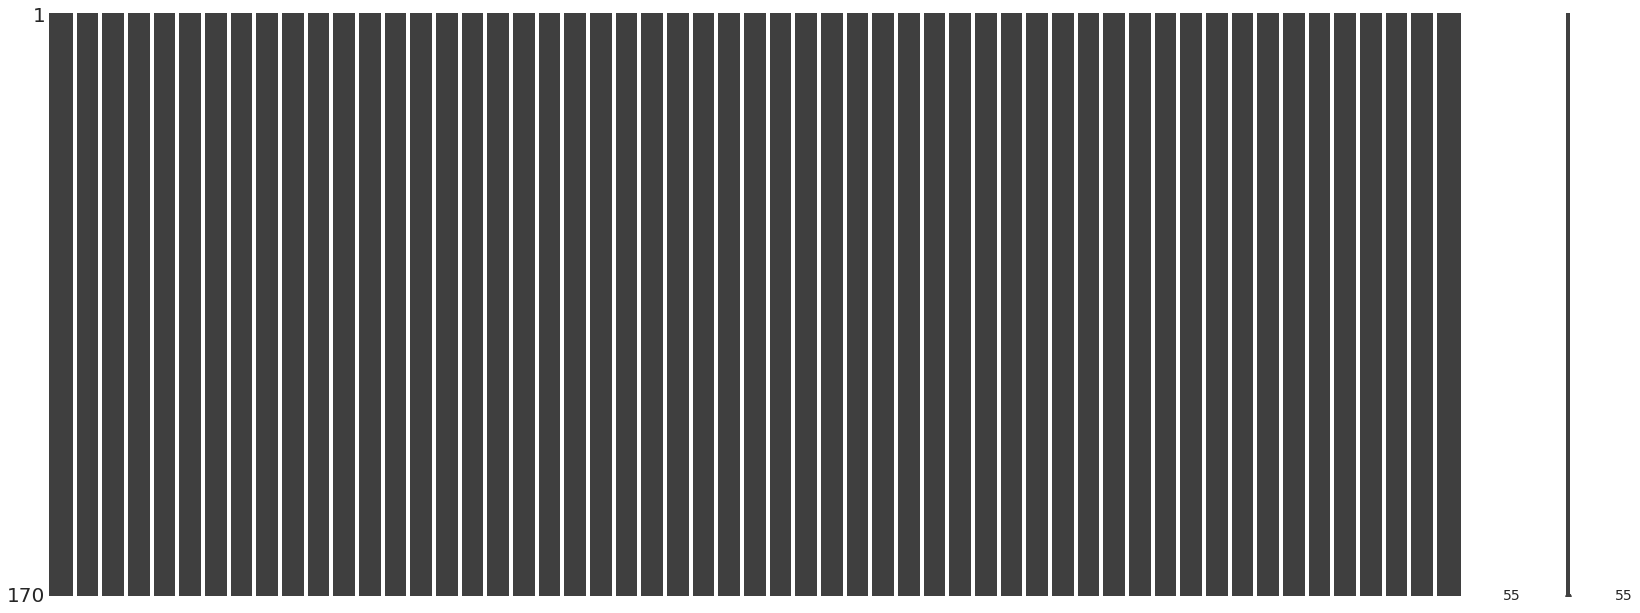

In [4]:
msno.matrix(df)

* Data doesnot have any null values.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Sorry_end                      170 non-null    int64
 1   Ignore_diff                    170 non-null    int64
 2   begin_correct                  170 non-null    int64
 3   Contact                        170 non-null    int64
 4   Special_time                   170 non-null    int64
 5   No_home_time                   170 non-null    int64
 6   2_strangers                    170 non-null    int64
 7   enjoy_holiday                  170 non-null    int64
 8   enjoy_travel                   170 non-null    int64
 9   common_goals                   170 non-null    int64
 10  harmony                        170 non-null    int64
 11  freeom_value                   170 non-null    int64
 12  entertain                      170 non-null    int64
 13  people_goals        

In [6]:
# Statistical analysis
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sorry_end,170.0,1.776471,1.627257,0.0,0.0,2.0,3.0,4.0
Ignore_diff,170.0,1.652941,1.468654,0.0,0.0,2.0,3.0,4.0
begin_correct,170.0,1.764706,1.415444,0.0,0.0,2.0,3.0,4.0
Contact,170.0,1.482353,1.504327,0.0,0.0,1.0,3.0,4.0
Special_time,170.0,1.541176,1.632169,0.0,0.0,1.0,3.0,4.0
No_home_time,170.0,0.747059,0.904046,0.0,0.0,0.0,1.0,4.0
2_strangers,170.0,0.494118,0.898698,0.0,0.0,0.0,1.0,4.0
enjoy_holiday,170.0,1.452941,1.546371,0.0,0.0,1.0,3.0,4.0
enjoy_travel,170.0,1.458824,1.557976,0.0,0.0,1.0,3.0,4.0
common_goals,170.0,1.576471,1.421529,0.0,0.0,2.0,3.0,4.0


<AxesSubplot:xlabel='Divorce_Y_N', ylabel='count'>

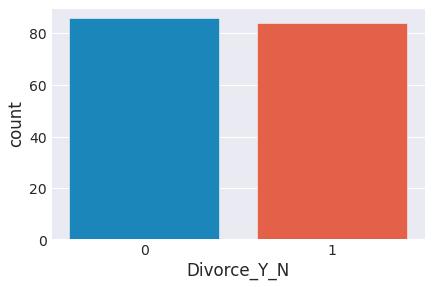

In [7]:
# labels
sns.countplot(df.Divorce_Y_N)

## Training and Testing Split

In [8]:
X = df.drop("Divorce_Y_N",axis=1)
y = df.Divorce_Y_N

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scaling data

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Random Forest Classifier

Accuracy: 95.34883720930233 %
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        22
           1       1.00      0.90      0.95        21

    accuracy                           0.95        43
   macro avg       0.96      0.95      0.95        43
weighted avg       0.96      0.95      0.95        43



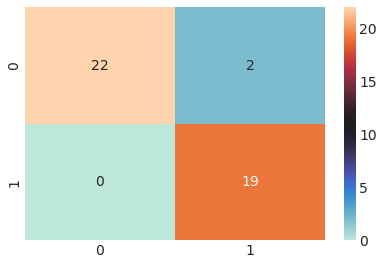

In [11]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
acc = accuracy_score(y_pred, y_test)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {acc*100} %")
print(report)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True,cmap="icefire")
plt.show()

### Adaboost Classifier

Accuracy: 93.02325581395348 %
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        22
           1       0.95      0.90      0.93        21

    accuracy                           0.93        43
   macro avg       0.93      0.93      0.93        43
weighted avg       0.93      0.93      0.93        43



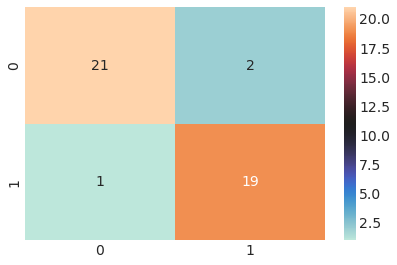

In [12]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred2 = ada.predict(X_test)
acc2 = accuracy_score(y_pred2, y_test)
report2 = classification_report(y_test, y_pred2)
print(f"Accuracy: {acc2*100} %")
print(report2)
cm2 = confusion_matrix(y_pred2, y_test)
sns.heatmap(cm2, annot=True,cmap="icefire")
plt.show()

### XGBoost Classifier

Accuracy: 95.34883720930233 %
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        22
           1       1.00      0.90      0.95        21

    accuracy                           0.95        43
   macro avg       0.96      0.95      0.95        43
weighted avg       0.96      0.95      0.95        43



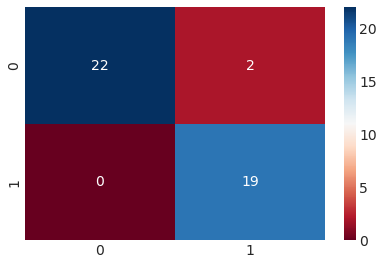

In [13]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
lgb = LGBMClassifier()
lgb.fit(X_train, y_train)
y_pred3 = lgb.predict(X_test)
acc3 = accuracy_score(y_pred3, y_test)
report3 = classification_report(y_test, y_pred3)
print(f"Accuracy: {acc3*100} %")
print(report3)
cm3 = confusion_matrix(y_pred3, y_test)
sns.heatmap(cm3, annot=True,cmap="RdBu")
plt.show()

# Pycaret

In [14]:
!pip install pycaret

     |████████████████████████████████| 301 kB 923 kB/s            
     |████████████████████████████████| 636 kB 14.2 MB/s            
     |████████████████████████████████| 24.2 MB 458 kB/s             
     |████████████████████████████████| 15.5 MB 31.5 MB/s            
     |████████████████████████████████| 167 kB 75.4 MB/s            
     |████████████████████████████████| 25.9 MB 1.2 MB/s            
     |████████████████████████████████| 10.4 MB 15.4 MB/s            
     |████████████████████████████████| 114 kB 69.5 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 1.0 MB 49.8 MB/s            
     |████████████████████████████████| 184 kB 70.1 MB/s            
     |████████████████████████████████| 1.1 MB 56.6 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 79 kB 6.5 MB/s             
     |████████████████████████████████| 58 kB 3.8 MB/s             
  Preparing metadata 

In [18]:
df_train = df[:127]
df_test = df[127:]

In [31]:
import pycaret
from pycaret import classification

clf = classification.setup(df,target="Divorce_Y_N",train_size=0.8)

,Description,Value
0,session_id,4952
1,Target,Divorce_Y_N
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(170, 55)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,54
8,Ordinal Features,False
9,High Cardinality Features,False


In [32]:
from pycaret.classification import *
best = compare_models(sort="AUC")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9703,1.0000,0.9429,1.0000,0.9692,0.9408,0.9446,0.0160
rf,Random Forest Classifier,0.9703,1.0000,0.9429,1.0000,0.9692,0.9408,0.9446,0.2910
et,Extra Trees Classifier,0.9775,1.0000,0.9571,1.0000,0.9769,0.9551,0.9580,0.2790
lightgbm,Light Gradient Boosting Machine,0.9632,1.0000,0.9429,0.9875,0.9626,0.9266,0.9312,0.1270
catboost,CatBoost Classifier,0.9703,1.0000,0.9429,1.0000,0.9692,0.9408,0.9446,1.4540
xgboost,Extreme Gradient Boosting,0.9709,0.9976,0.9571,0.9875,0.9703,0.9418,0.9455,4.8840
ada,Ada Boost Classifier,0.9703,0.9905,0.9429,1.0000,0.9692,0.9408,0.9446,0.0630
knn,K Neighbors Classifier,0.9703,0.9857,0.9429,1.0000,0.9692,0.9408,0.9446,0.0740
lda,Linear Discriminant Analysis,0.9549,0.9815,0.9571,0.9625,0.9569,0.9095,0.9154,0.0160
gbc,Gradient Boosting Classifier,0.9484,0.9541,0.9286,0.9750,0.9469,0.8973,0.9053,0.0650


In [33]:
lr = classification.create_model("lr")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9286,1.0000,0.8571,1.0000,0.9231,0.8571,0.8660
5,0.9286,1.0000,0.8571,1.0000,0.9231,0.8571,0.8660
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9231,1.0000,0.8571,1.0000,0.9231,0.8471,0.8571
8,0.9231,1.0000,0.8571,1.0000,0.9231,0.8471,0.8571
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [34]:
tuned_lr = classification.tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9286,1.0000,0.8571,1.0000,0.9231,0.8571,0.8660
5,0.9286,1.0000,0.8571,1.0000,0.9231,0.8571,0.8660
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9231,1.0000,0.8571,1.0000,0.9231,0.8471,0.8571
8,0.9231,1.0000,0.8571,1.0000,0.9231,0.8471,0.8571
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [36]:
classification.evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

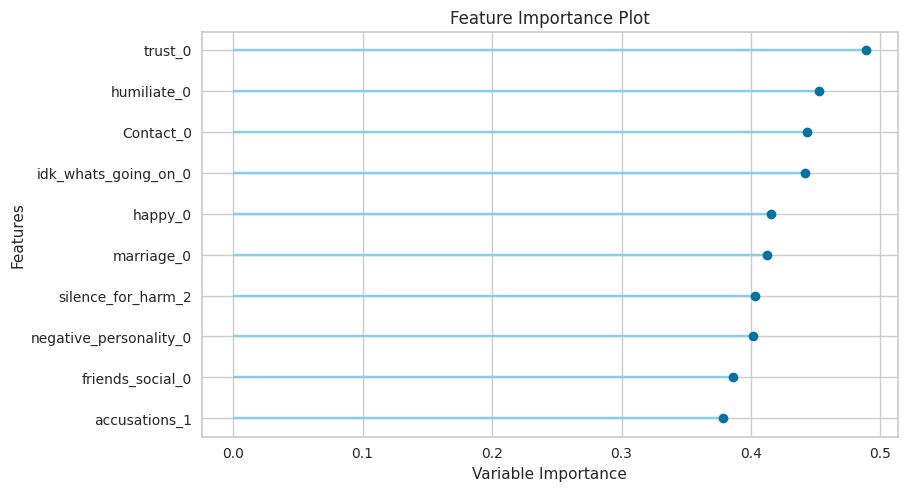

In [40]:
classification.plot_model(tuned_lr, plot="feature")

In [41]:
final_model = finalize_model(tuned_lr)

In [42]:
final_model

LogisticRegression(C=3.153, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=4952, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

* As this dataset is too small, testing is not implemented in this notebook.